In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('fake_reviews_dataset.csv')

In [ ]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
print(df['category'].unique())

['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [ ]:
df['rating'].value_counts()

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


In [ ]:
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
# plt.pie(values ,labels=labels, explode=(0.1,0,0,0,0), shadow=True,autopct='%1.1f%%')
# plt.show()
print(labels)
print(values)

Index([5.0, 4.0, 3.0, 1.0, 2.0], dtype='float64', name='rating')
[24559  7965  3786  2155  1967]


In [ ]:
# Converting into LOWER_CASE
df['new_text'] = df['text_'].str.lower()
df.head()

,category,rating,label,text_,new_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...","love it, a great upgrade from the original. i..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,this pillow saved my back. i love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...","missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,very nice set. good quality. we have had the s...


In [ ]:
# Remove Puncutation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))
  # The first two arguments ('' and '') are empty strings, meaning there's nothing to replace and nothing to replace with.

In [ ]:
df['new_text'] = df['new_text'].apply(lambda X: remove_punctuation(X))

In [ ]:
df.head()

,category,rating,label,text_,new_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy and very comfortab...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love it a great upgrade from the original ive...
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,this pillow saved my back i love the look and ...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information on how to use it but it is...
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,very nice set good quality we have had the set...


In [ ]:
import nltk

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
# Removing Stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
df['new_text'] = df['new_text'].apply(lambda X: remove_stopwords(X))

In [ ]:
# Removing of Frequent Words

from collections import Counter
word_count = Counter()

for text in df['new_text']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('great', 16419),
 ('book', 15001),
 ('good', 14195),
 ('one', 13395),
 ('love', 10805),
 ('would', 10362),
 ('well', 10278),
 ('story', 9626),
 ('like', 9425),
 ('read', 8868)]

In [ ]:
# FREQUENT_WORDS = set(word for (word,wc) in word_count.most_common(3))
# def remove_freq_words(text):
#   return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [ ]:
# Removing of rare Word

RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'32degrees',
 'ducks',
 'dwrthis',
 'gallbladder',
 'hippora',
 'hyvent',
 'jacketit',
 'propertys',
 'timemans'}

In [ ]:
# def remove_rare_words(text):
#   return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [ ]:
# Remove Special Character

import re
def remove_special_char(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = re.sub('\s+',' ',text)
  return text

In [ ]:
df['new_text'] = df['new_text'].apply(lambda X:remove_special_char(X))

In [ ]:
# Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df['Stemmed_text'] = df['new_text'].apply(lambda X: stem_words(X))

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])


  df['lemmatized_text'] = df['new_text'].apply(lambda X: lemmatize_words(X))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
  import nltk
  nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
  df['lemmatized_text'] = df['new_text'].apply(lambda X: lemmatize_words(X))

In [ ]:
df

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,love well made sturdi comfort love itveri pretti,love well make sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original ive mine couple years,love great upgrad origin ive mine coupl year,love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,miss inform use great product price,miss information use great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months,nice set good qualiti set two month,nice set good quality set two month
...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra ran small order two band c...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactli would littl larg small size...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,like noth dress reason gave 4 star order size ...,like nothing dress reason give 4 star order si...


In [ ]:
df['label'].value_counts()

,count
label,
CG,20216
OR,20216


In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,love well made sturdi comfort love itveri pretti,love well make sturdy comfortable love itvery ...,75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original ive mine couple years,love great upgrad origin ive mine coupl year,love great upgrade original ive mine couple year,80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow save back love look feel pillow,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,miss inform use great product price,miss information use great product price,81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months,nice set good qualiti set two month,nice set good quality set two month,85
...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra ran small order two band c...,read review say bra run small order two band c...,1694
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactli would littl larg small size...,wasnt sure exactly would little large small si...,1304
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,1987
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,like noth dress reason gave 4 star order size ...,like nothing dress reason give 4 star order si...,1301


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         40432 non-null  object 
 1   rating           40432 non-null  float64
 2   label            40432 non-null  object 
 3   text_            40432 non-null  object 
 4   new_text         40432 non-null  object 
 5   Stemmed_text     40432 non-null  object 
 6   lemmatized_text  40432 non-null  object 
 7   length           40432 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.5+ MB


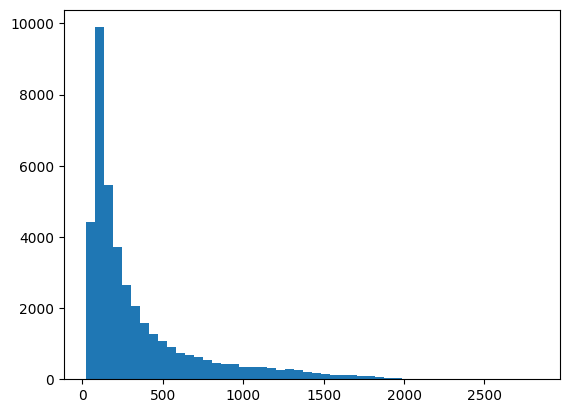

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0  
OR     396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0

In [ ]:
df.head()

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,love well made sturdi comfort love itveri pretti,love well make sturdy comfortable love itvery ...,75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original ive mine couple years,love great upgrad origin ive mine coupl year,love great upgrade original ive mine couple year,80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow save back love look feel pillow,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,miss inform use great product price,miss information use great product price,81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months,nice set good qualiti set two month,nice set good quality set two month,85


In [ ]:
# X = df.iloc[:,[1,6]].values  #features
# y = df.iloc[:,2:3].values  #target variable

X = df[['rating', 'lemmatized_text']]
y = df['label']


In [ ]:
print(X)
print(y)

       rating                                    lemmatized_text
0         5.0  love well make sturdy comfortable love itvery ...
1         5.0   love great upgrade original ive mine couple year
2         5.0             pillow save back love look feel pillow
3         1.0           miss information use great product price
4         5.0                nice set good quality set two month
...       ...                                                ...
40427     4.0  read review say bra run small order two band c...
40428     5.0  wasnt sure exactly would little large small si...
40429     2.0  wear hood wear hood wear jacket without hood 3...
40430     1.0  like nothing dress reason give 4 star order si...
40431     5.0  work wed industry work long day foot outside h...

[40432 rows x 2 columns]
0        CG
1        CG
2        CG
3        CG
4        CG
         ..
40427    OR
40428    CG
40429    OR
40430    CG
40431    OR
Name: label, Length: 40432, dtype: object


In [ ]:
# df['new_label'] = df['label'].apply(lambda x: 1 if x == 'OR' else 0)

In [ ]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'OR' else 0)

In [ ]:
df

,category,rating,label,text_,new_text,Stemmed_text,lemmatized_text,length
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,love well made sturdi comfort love itveri pretti,love well make sturdy comfortable love itvery ...,75
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",love great upgrade original ive mine couple years,love great upgrad origin ive mine coupl year,love great upgrade original ive mine couple year,80
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow,pillow save back love look feel pillow,67
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",missing information use great product price,miss inform use great product price,miss information use great product price,81
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,nice set good quality set two months,nice set good qualiti set two month,nice set good quality set two month,85
...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra ran small order two band c...,read review say bra run small order two band c...,1694
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactli would littl larg small size...,wasnt sure exactly would little large small si...,1304
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,1987
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,like noth dress reason gave 4 star order size ...,like nothing dress reason give 4 star order si...,1301


In [ ]:
X = df[['rating', 'lemmatized_text']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# v = TfidfVectorizer()
# # X_train_lemmatized_tfidf = v.fit_transform(X_train['lemmatized_text'])

v = TfidfVectorizer()
X_lemmatized_tfidf = v.fit_transform(X['lemmatized_text'])

In [ ]:
# Combine 'rating' and vectorized 'lemmatized_text'
X_combined_tfidf = hstack([X['rating'].values.reshape(-1, 1), X_lemmatized_tfidf])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=1)


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred


In [ ]:
# Instantiate the Logistic Regression model
model = LogisticRegression(lr=0.01, n_iters=1000)

# Fit the model to the training data
# Note: Ensure that 'y_train' is in a compatible shape (1D array)
model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = model.predict(X_test.toarray())

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


Accuracy: 0.7235068628663287
              precision    recall  f1-score   support

           0       0.87      0.54      0.66      4105
           1       0.66      0.91      0.77      3982

    accuracy                           0.72      8087
   macro avg       0.76      0.73      0.71      8087
weighted avg       0.76      0.72      0.71      8087



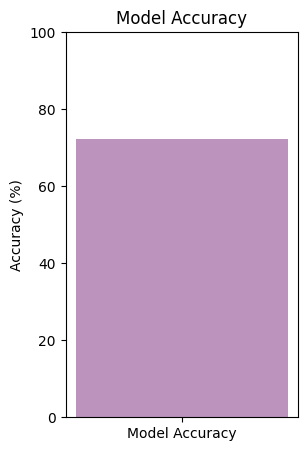

In [ ]:
# Assuming 'accuracy' is the accuracy value obtained from accuracy_score
accuracy = accuracy_score(y_test, predictions)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

# Create a bar graph
plt.figure(figsize=(3, 5))
plt.bar(['Model Accuracy'], [accuracy_percentage], color='#bc93bd')

# Add title and labels
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set limit from 0 to 100 to represent a percentage

# Show the plot
plt.show()
